## Connect to drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


## libraries

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import cv2
from PIL import Image
import glob as gb
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, BatchNormalization, Dropout
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
sns.set(rc={'figure.figsize':(15,10)})

# get the data

In [3]:
classes = ['NORMAL', 'PNEUMONIA']
img_size = 227

### Function to get images

In [4]:
def get_images(path):
  data = []
  for label in classes:
    images = gb.glob(pathname=str(path + label + '/*.jpeg'))
    class_num = classes.index(label)
    for image in images:
      image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
      width, height = Image.open(image).size
      if width >= 227 and height >= 227:
        resized_img = cv2.resize(image_array, (img_size, img_size))
        data.append([resized_img, class_num])
  return np.array(data)

In [5]:
train = get_images('/gdrive/My Drive/chest_xray/train/')
test = get_images('/gdrive/My Drive/chest_xray/test/')
val = get_images('/gdrive/My Drive/chest_xray/val/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


In [6]:
x = []
y = []

for feature, label in train:
    x.append(feature)
    y.append(label)

for feature, label in test:
    x.append(feature)
    y.append(label)
    
for feature, label in val:
    x.append(feature)
    y.append(label)

# Convert to array and scale

In [7]:
x = np.array(x) / 255

In [8]:
y = np.array(y)

In [9]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
x.shape

(5815, 227, 227)

## Split data

In [11]:
x_train, xtest, y_train, ytest = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
y_train = np_utils.to_categorical(y_train)

## Model architecture

In [13]:
model = models.Sequential()

model.add(Input(shape=(227, 227, 1)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2, activation = "softmax"))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)

model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
history = model.fit(x_train,y_train, batch_size= 10, epochs = 30)

Epoch 1/30
407/407 [==============================] - 30s 50ms/step - loss: 0.4950 - accuracy: 0.9103
Epoch 2/30
407/407 [==============================] - 20s 50ms/step - loss: 0.4012 - accuracy: 0.9393
Epoch 3/30
407/407 [==============================] - 20s 50ms/step - loss: 0.4244 - accuracy: 0.9398
Epoch 4/30
407/407 [==============================] - 21s 51ms/step - loss: 0.4477 - accuracy: 0.9396
Epoch 5/30
407/407 [==============================] - 20s 50ms/step - loss: 0.3519 - accuracy: 0.9531
Epoch 6/30
407/407 [==============================] - 20s 50ms/step - loss: 0.2933 - accuracy: 0.9592
Epoch 7/30
407/407 [==============================] - 21s 50ms/step - loss: 0.3382 - accuracy: 0.9577
Epoch 8/30
407/407 [==============================] - 20s 50ms/step - loss: 0.2609 - accuracy: 0.9597
Epoch 9/30
407/407 [==============================] - 21s 50ms/step - loss: 0.3250 - accuracy: 0.9585
Epoch 10/30
407/407 [==============================] - 20s 50ms/step - loss: 0.432

# Evaluate data

## loss and accuracy plot

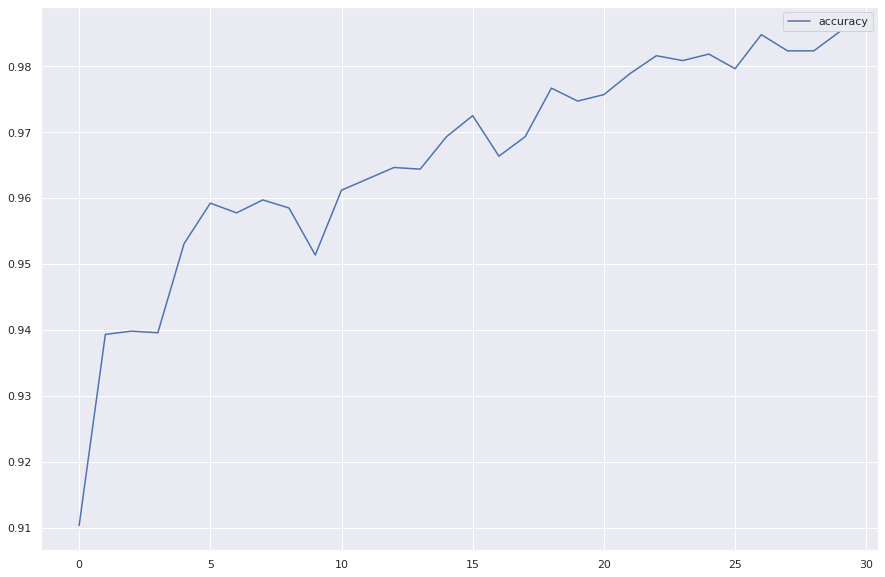

In [15]:
#plot the accuracy
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label='accuracy')
plt.legend();

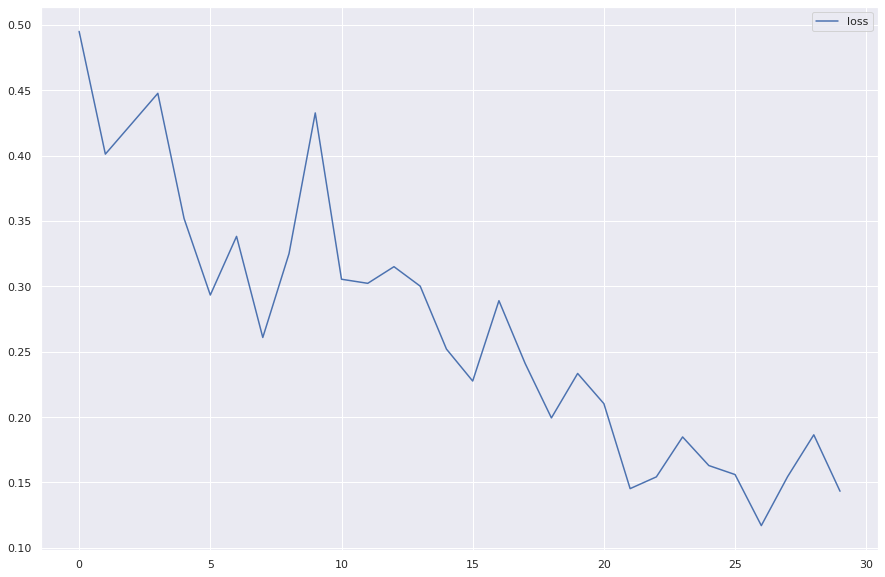

In [16]:
#plot the loss
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.legend()

## Check evalute in train and test data

In [17]:
# Train
loss, acc = model.evaluate(x_train, y_train)
print('Train')
print(f'loss : {loss}')
print(f'acc : {acc*100}')

128/128 [==============================] - 7s 53ms/step - loss: 0.0883 - accuracy: 0.9850
Train
loss : 0.08834149688482285
acc : 98.50122928619385


In [19]:
# Test
loss, acc = model.evaluate(xtest, np_utils.to_categorical(ytest))
print('Test')
print(f'loss : {loss}')
print(f'acc : {acc*100}')

55/55 [==============================] - 4s 63ms/step - loss: 1.2324 - accuracy: 0.9307
Test
loss : 1.2323752641677856
acc : 93.06589961051941


In [20]:
pred = model.predict(xtest)
pred

array([[1.00000000e+00, 3.43831154e-17],
       [1.00000000e+00, 1.37460627e-25],
       [1.06663745e-36, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [3.96236727e-13, 1.00000000e+00],
       [7.83407158e-05, 9.99921679e-01]], dtype=float32)

In [21]:
prediction = np.argmax(pred, axis=-1)
prediction

array([0, 0, 1, ..., 1, 1, 1])

## Confusion matrix

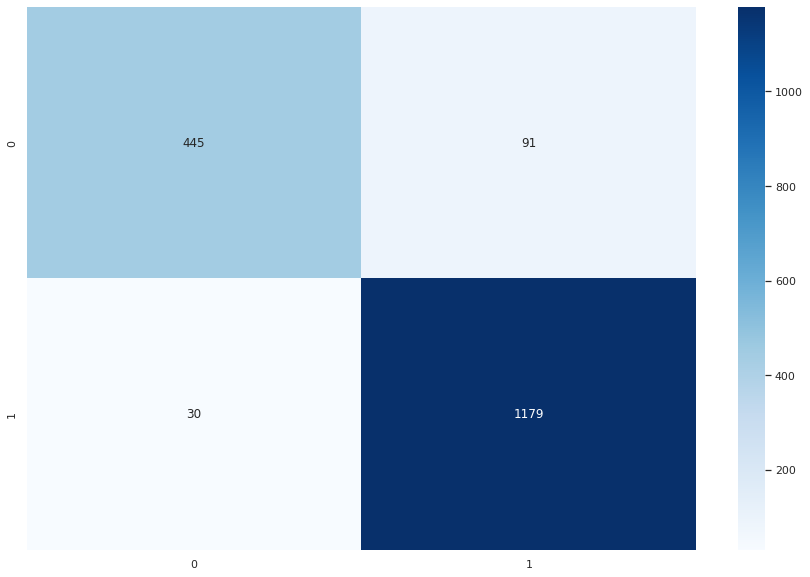

In [22]:
sns.heatmap(confusion_matrix(prediction, ytest), annot=True, fmt='1', cmap='Blues');

## Recall and Precision

In [23]:
print('Model Recall score  : {0:0.4f}'. format(recall_score(ytest, prediction,average='weighted')))
print('Model Precision  : {0:0.4f}'. format(precision_score(ytest, prediction,average='weighted')))

Model Recall score  : 0.9307
Model Precision  : 0.9357


In [24]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       475
           1       0.98      0.93      0.95      1270

    accuracy                           0.93      1745
   macro avg       0.90      0.93      0.92      1745
weighted avg       0.94      0.93      0.93      1745

